### Histograms

#### Distribution of the Variable
The amount of times that a value appears in the dataset. 

One of the common ways to represent a distribution is by using a histogram, which is a graph showing the frequency of each value for a given variable.

Here is an example:

In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from cycler import cycler

matplotlib.style.use("dark_background")
%matplotlib inline
rcParams["figure.figsize"] = (15, 6)
rcParams["axes.prop_cycle"] = cycler(color=["#4299E1", "#F56565", "#48BB78", "#ED8936", "#9F7AEA", "#ECC94B"])
rcParams["figure.facecolor"] = "#1A202C"
rcParams["axes.facecolor"] = "#2D3748"
rcParams["axes.edgecolor"] = "#A0AEC0"
rcParams["axes.grid"] = True
rcParams["grid.color"] = "#A0AEC0"
rcParams["grid.alpha"] = 0.7
rcParams["axes.titlecolor"] = "#A0AEC0"
rcParams["axes.labelcolor"] = "#A0AEC0"
rcParams["xtick.color"] = "#A0AEC0"
rcParams["ytick.color"] = "#A0AEC0"

Text(0, 0.5, 'Frequency')

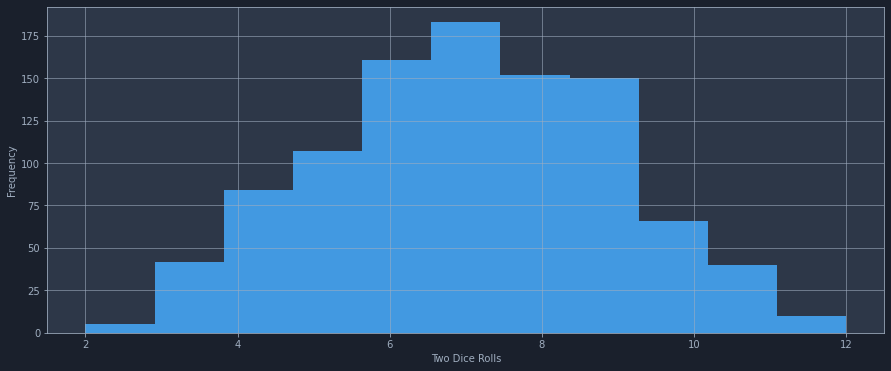

In [2]:
from random import random
import numpy as np
import pandas as pd

# Simulating 1000 rolls of 2 dice
dieRolls1 = [round(random() * 5 + 1) for i in range(0, 1000)]
dieRolls2 = [round(random() * 5 + 1) for i in range(0, 1000)]

# Adding the values of the rolled dice values
dieRollSum = np.array([dieRolls1[i] + dieRolls2[i] for i in range(0, 1000)])
series = pd.Series(dieRollSum)

# Showing the frequency of each value
series.plot.hist(bins=11) # 11 because getting a 1 from two dice is impossible
plt.xlabel("Two Dice Rolls")
plt.ylabel("Frequency")

#### NSFG Data
Here are the columns of the NSFG data:

In [3]:
nsfg = pd.read_pickle("nsfg_data.pkl")
nsfg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Now, let's plot the histograms for the NSFG (National Survey of Family Growth).

Text(0, 0.5, 'Frequency')

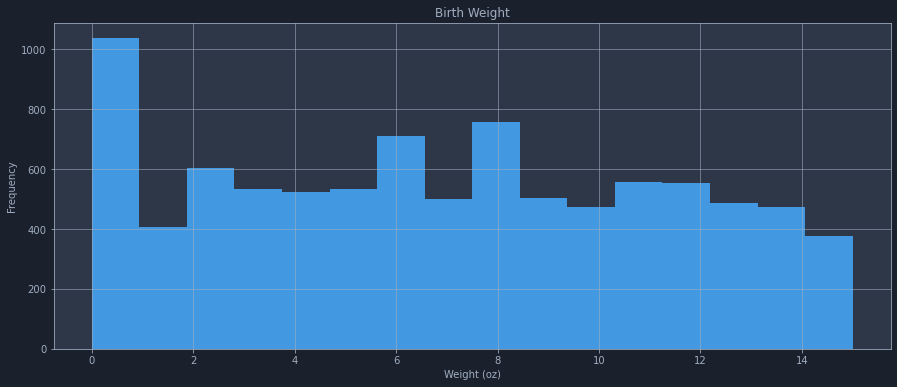

In [4]:
liveOutcomes = nsfg[nsfg["outcome"] == 1]
liveOutcomes["birthwgt_oz"].plot.hist(bins=16)
plt.title("Birth Weight")
plt.xlabel("Weight (oz)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

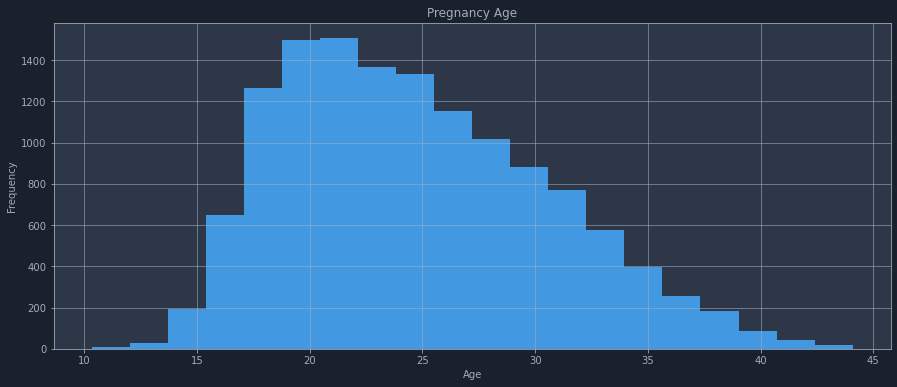

In [5]:
nsfg["agepreg"].plot.hist(bins=20)
plt.title("Pregnancy Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

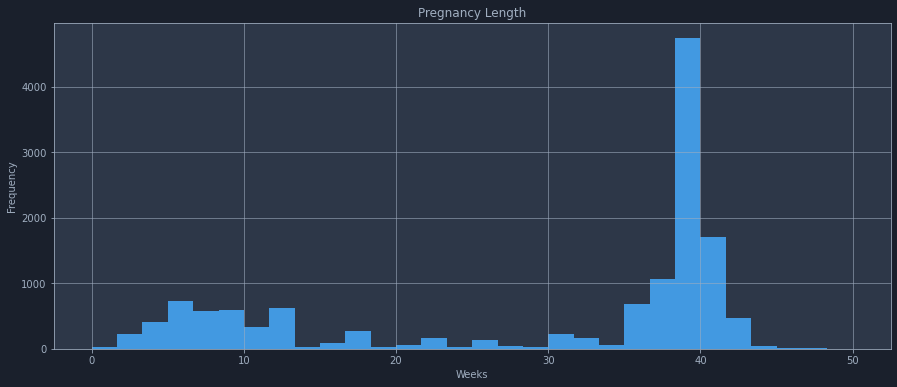

In [6]:
nsfg["prglngth"].plot.hist(bins=30)
plt.title("Pregnancy Length")
plt.xlabel("Weeks")
plt.ylabel("Frequency")

#### Outliers
It is a good idea to check for outliers, which might be caused by errors in measurement, or accurate reports of rare events.

In this case, pregnancy length values below 10 weeks for live births are certainly errors; the most likely explanation is that the outcome was not recorded correctly.

Values higher than 30 are probably legitimate.

Between 10 and 30 weeks, some may be errors, but some may represent premature babies.

#### First babies
Now, let's compare the histograms of pregnancy lengths for first babies and others.

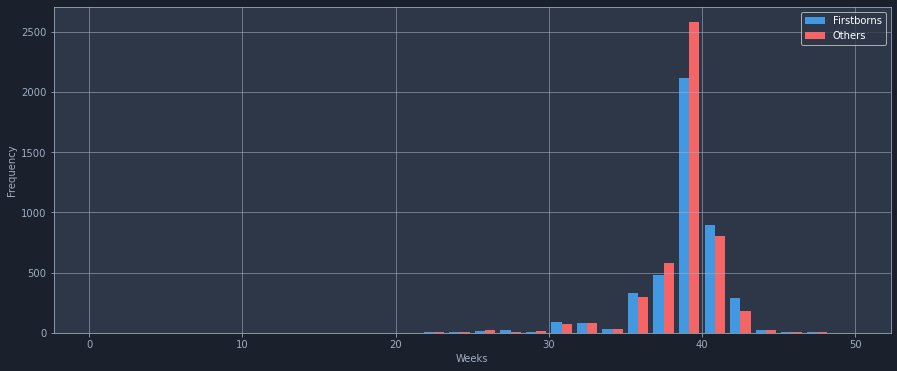

In [7]:
firsts = liveOutcomes[liveOutcomes["birthord"] == 1]
others = liveOutcomes[liveOutcomes["birthord"] != 1]

plt.hist((firsts["prglngth"], others["prglngth"]), bins=30, label=("Firstborns", "Others"))
plt.xlabel("Weeks")
plt.ylabel("Frequency")
plt.legend(loc=1)

Here is a 3D histogram showing the relationship of both the pregnancy age and the pregnancy length with regards to the frequency of their values.

There doesn't seem to be any correlation between the pregnancy age and the pregnancy length.

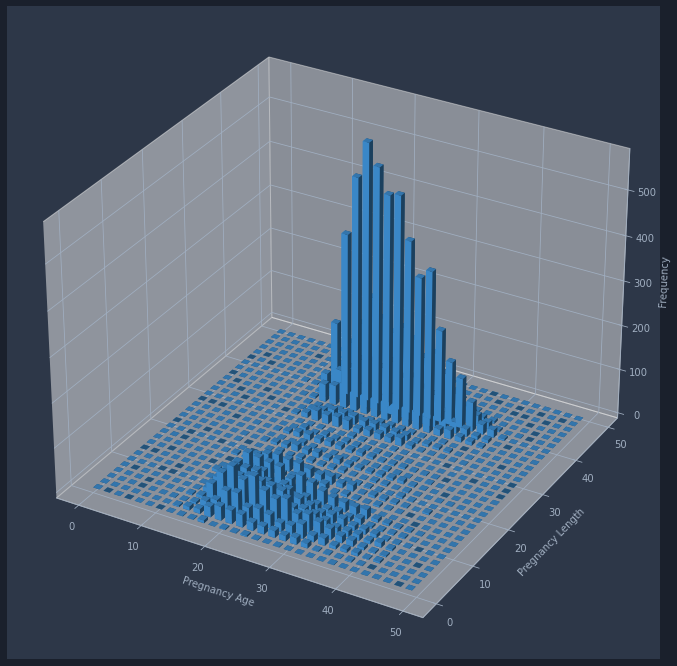

In [8]:
# Creates a figure object, where we can change the size of the figure or add multiple axes
fig = plt.figure(figsize=(12, 12))

# Adds an Axes to a figure
ax = fig.add_subplot(111, projection="3d")

# Creates a histogram for 2 variables
hist, xedges, yedges = np.histogram2d(nsfg["agepreg"], nsfg["prglngth"], bins=30, range=[[0, 50], [0, 50]])

# Creates a standard grid numbering ([0,0], [0,1], [0,2], [1,0], [1,1], ...) to create the bars on
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
# Flattens the array into 1D array
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Sets the width and length of the bar
dx = dy = 1 #np.ones_like(zpos) # Creates a matrix of ones based on the param's shape

# Sets the height of the bar
dz = hist.ravel()

# Creates a 3D bar graph
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort="average")
ax.set_xlabel("Pregnancy Age")
ax.set_ylabel("Pregnancy Length")
ax.set_zlabel("Frequency")

plt.show()

#### Probability Mass Function
A distribution can also be represented by a probability mass function (PMF). This function maps each unique value to its probability.

The probability is calculated by dividing the frequency of a value by the sample size, n. When plotting histograms, this can also be done by including a `density=True` argument.

For example, taking the same histogram comparing the firstborns from others, as done above, the histogram can be plotted like so:

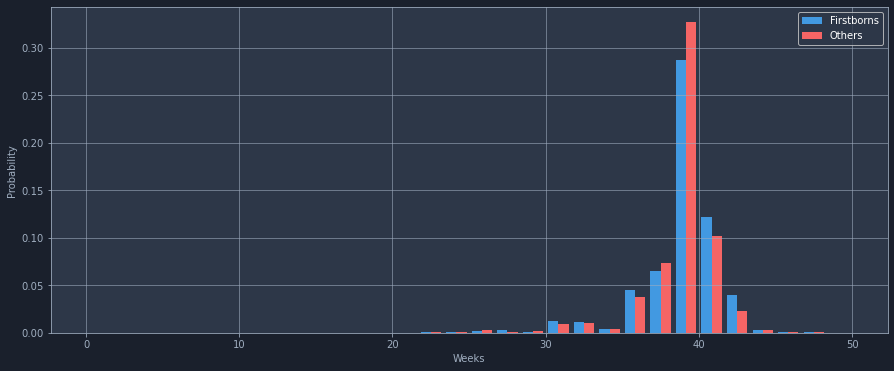

In [9]:
# Note the density=True argument below
plt.hist((firsts["prglngth"], others["prglngth"]), bins=30, density=True, label=("Firstborns", "Others"))
plt.xlabel("Weeks")
plt.ylabel("Probability")
plt.legend(loc=1)

#### Other Visualizations
Once we have an idea of what is going on, by looking at histograms and probability mass function graphs of various variables, a good next step is to design a visualization that makes the patterns we have identified as clear as possible.

In the case with the comparison between the pregnancy lengths for firstborns and others, we can visualize their difference.

Text(0, 0.5, 'Probability')

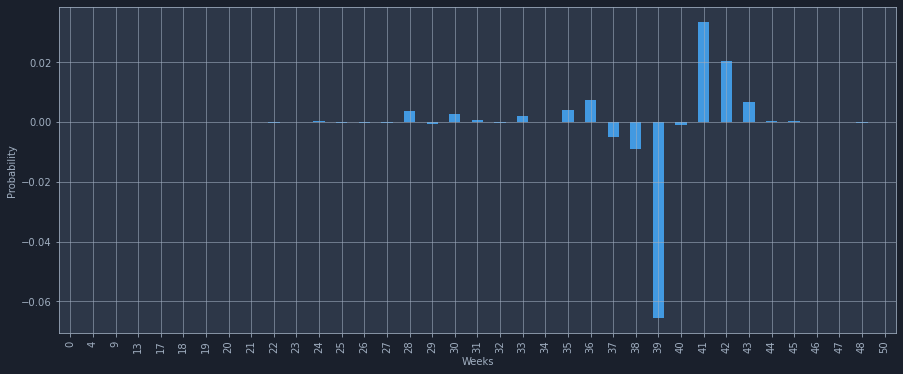

In [10]:
# These two lines are the probability mass functions
firstsProb = firsts["prglngth"].value_counts().sort_index() / len(firsts)
othersProb = others["prglngth"].value_counts().sort_index() / len(others)

diff = firstsProb - othersProb

diff.plot.bar()
plt.xlabel("Weeks")
plt.ylabel("Probability")

And here is the difference graph zoomed in around the mode (the value that occurs most frequently) of the graph.

Text(0, 0.5, 'Probability')

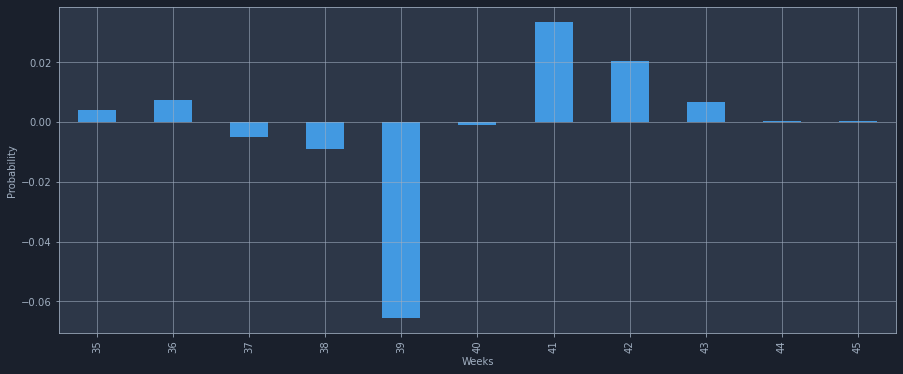

In [11]:
firstsProb = firsts["prglngth"].value_counts().sort_index().loc[35:45] / len(firsts)
othersProb = others["prglngth"].value_counts().sort_index().loc[35:45] / len(others)

diff = firstsProb - othersProb

diff.plot.bar()
plt.xlabel("Weeks")
plt.ylabel("Probability")

According to this difference graph, the firstborns are more likely to be born in weeks 41 and 42, and much less like to be born at week 39. Therefore, according to our data, the firstborns are more likely to be born later.

However, we cannot know for sure that this effect is real yet; it might be due to random variation (noise).